In [378]:
# Load general utilities
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import datetime
import numpy as np
import pickle
import time
import seaborn as sns
import statistics as stat
import random
import glob
import os
import re
import dabl

# Load sklearn utilities
# ----------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, brier_score_loss, mean_squared_error, r2_score, recall_score, precision_score,f1_score
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

# Other Packages
# --------------
from scipy.stats import kendalltau
from sklearn.cluster import KMeans
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt
%matplotlib inline

# Load debugger, if required
#import pixiedust
pd.options.mode.chained_assignment = None #'warn'

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

#set random_state
random_state=42


data = pd.read_csv('updated_quitting_predictor_data2.csv')
print(data.shape)

In [379]:
# Fill NaN values with the specified default values
data.fillna({
    'title_1': '',
    'company_1':'',
    'title_2': '',
    'company_2':'',
    'level':'',
    'education level':'',
    'total_exp': 0,
    'Quitter': 0,
    'time_duration_1': data['time_duration_1'].mean(),
    'time_duration_2': data['time_duration_2'].mean(),
    'Word_Count': 0,
    'peak': 0,
    'bins': 0,
    'company_work_dur_check': 0,
    'title_work_dur_check': 0,
    'custom_url': 0,
}, inplace=True)


In [173]:
types = dabl.detect_types(data)
print(types)

                        continuous  dirty_float  low_card_int_ordinal  \
profile_url                  False        False                 False   
First Name                   False        False                 False   
Middle Name                  False        False                 False   
Surname                      False        False                 False   
Linkedin_url                 False        False                 False   
...                            ...          ...                   ...   
skills_is_null               False        False                 False   
peak                         False        False                 False   
bins                         False        False                 False   
company_work_dur_check        True        False                 False   
title_work_dur_check          True        False                 False   

                        low_card_int_categorical  categorical   date  \
profile_url                                False   

In [ ]:
df = dabl.clean(data)
print(len(df.columns))

In [ ]:
dabl.plot(df, target_col="Quitter")

In [118]:
for columns in df.columns:
    print(columns)

profile_url
First Name
Middle Name
Surname
Linkedin_url
connections
Summary
Skills
education level
title_1
company_1
time_duration_1
Job_Description_1
title_2
company_2
time_duration_2
Job_Description_2
title_3
company_3
time_duration_3
Job_Description_3
title_4
company_4
time_duration_4
Job_Description_4
title_5
company_5
time_duration_5
Job_Description_5
title_6
company_6
time_duration_6
Job_Description_6
title_7
company_7
time_duration_7
Job_Description_7
title_8
company_8
time_duration_8
Job_Description_8
title_9
company_9
time_duration_9
Job_Description_9
title_10
company_10
time_duration_10
Job_Description_10
school_name_1
ed_time_duration_1
degree_name_1
education_fos_1
school_name_2
ed_time_duration_2
degree_name_2
education_fos_2
school_name_3
ed_time_duration_3
degree_name_3
education_fos_3
State
City
job 1 location
job 2 location
job 3 location
job 4 location
job 5 location
job 6 location
job 7 location
job 8 location
job 9 location
job 10 location
level
total_exp
Quitter
cu

**Simple Classifier Model**

In [ ]:
columns = ['title_1', 'company_1', "level", "total_exp", "Quitter", "time_duration_1", 'Region', 'Word_Count',
           'peak','bins','company_work_dur_check','title_work_dur_check',"custom_url",'education level']

df = data[columns]

ec = dabl.SimpleClassifier(random_state=42).fit(df, target_col='Quitter') 

Depth: 5
Number of leaves: 32


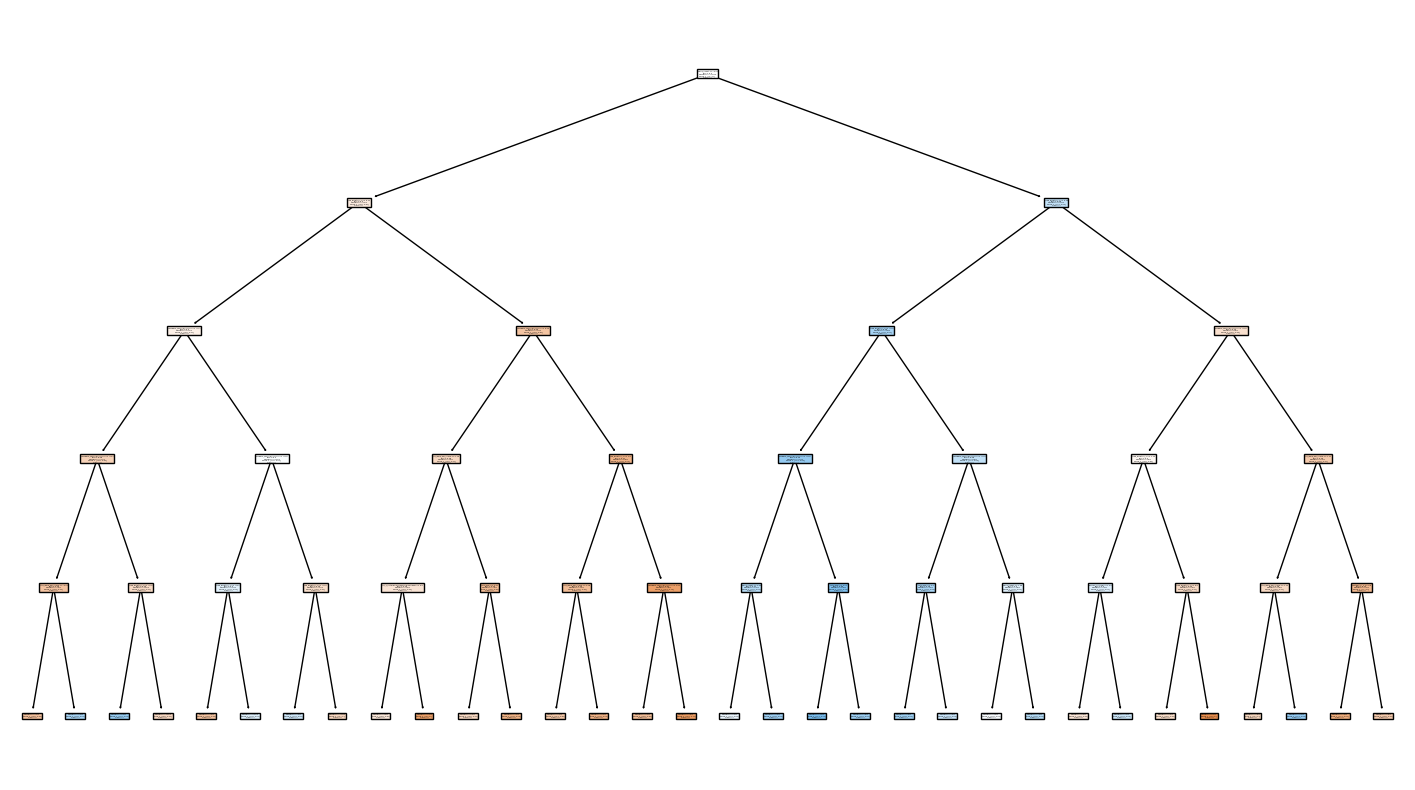

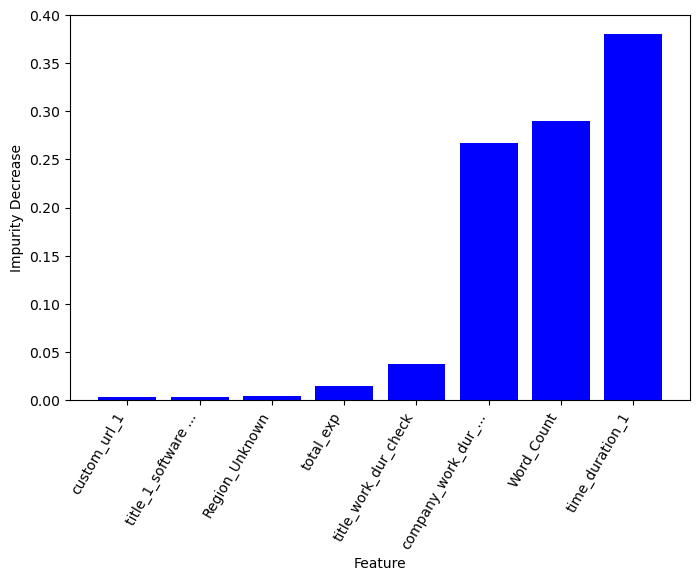

In [146]:
dabl.explain(ec,target_col='Quitter')

**Enhanced Classifier Model**

In [ ]:
ac = dabl.AnyClassifier().fit(df, target_col='Quitter') 
dabl.explain(ac,target_col='Quitter')

In [72]:
pred = ec.predict(df)

In [ ]:
import numpy as np

print(np.sum(pred==1))

print(np.sum(pred==0))

tot = len(pred)

## CatBoost Model

In [381]:
columns2 = ['title_1','company_1','title_2','company_2','education level','level','Region','bins',
           'company_work_dur_check','title_work_dur_check','Word_Count','total_exp','custom_url',
           'time_duration_1','time_duration_2','Quitter','peak']


columns = ['title_1','company_1','level','Region','bins',
           'company_work_dur_check','title_work_dur_check','Word_Count','total_exp','custom_url',
           'time_duration_1','Quitter']



df = data[columns2]

In [382]:
df.columns

Index(['title_1', 'company_1', 'title_2', 'company_2', 'education level',
       'level', 'Region', 'bins', 'company_work_dur_check',
       'title_work_dur_check', 'Word_Count', 'total_exp', 'custom_url',
       'time_duration_1', 'time_duration_2', 'Quitter', 'peak'],
      dtype='object')

In [383]:
df['peak'].astype(int)
df['bins'].astype(int)
df['total_exp'].astype(int)
df['Word_Count'].astype(int)
df['custom_url'].astype(int)
df['time_duration_1'].astype(float)
df['time_duration_2'].astype(float)
df['company_work_dur_check'].astype(float)
df['title_work_dur_check'].astype(float)
df['title_1'].astype(str)
df['company_1'].astype(str)
df['title_2'].astype(str)
df['company_2'].astype(str)
df['level'].astype(str)
df['Region'].astype(str)
df['education level'].astype(str)


0         Bachelor's
1         Bachelor's
2           Master's
3           Master's
4         Bachelor's
             ...    
185035      Master's
185036    Bachelor's
185037      Master's
185038      Master's
185039    Bachelor's
Name: education level, Length: 185040, dtype: object

In [386]:
X = df.drop('Quitter', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, df['Quitter'], test_size=0.10, 
                                                    random_state=2)

from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class (target 0)
#rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
#X_train, y_train = rus.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#categorical_features_indices = np.where(X_train.dtypes != int)[0]
#categorical_features_indices = [0,1,2,6,13]
categorical_features_indices = [0,1,2,3,4,5,6]

y_train = pd.to_numeric(y_train).astype('int32')
y_test = pd.to_numeric(y_test).astype('int32')

(166536, 16)
(166536,)
(18504, 16)
(18504,)


In [387]:
categorical_features_indices

[0, 1, 2, 3, 4, 5, 6]

In [324]:
def fit_classification(model, X_train,y_train, X_test, y_test,
                          cv_parameters = {},
                          model_name = None,
                          random_state = 42,
                          output_to_file = True,
                          print_to_screen = True):
    
    np.random.seed(random_state)

    # --------------------------
    #   Step 2 - Fit the model
    # --------------------------

    cv_model = GridSearchCV(model, cv_parameters)
    
    start_time = time.time()
    cv_model.fit(X_train, y_train,cat_features=categorical_features_indices)
    end_time = time.time()
    
    best_model = cv_model.best_estimator_
    
    if print_to_screen:

        if model_name != None:
            print("=========================================================")
            print("  Model: " + model_name)
            print("=========================================================")

        print("Fit time: " + str(round(end_time - start_time, 2)) + " seconds")
        print("Optimal parameters:")
        print(cv_model.best_params_)
        print("")
    
    # -------------------------------
    #   Step 3 - Evaluate the model
    # -------------------------------
    
    # If possible, make probability predictions
    try:
        y_pred_probs = best_model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
        
        probs_predicted = True
    except:
        probs_predicted = False
    
    # Make predictions; if we were able to find probabilities, use
    # the threshold that maximizes the accuracy in the training set.
    # If not, just use the learner's predict function
    if probs_predicted:
        y_train_pred_probs = best_model.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_probs)
        
        true_pos_train = tpr_train*(y_train.sum())
        true_neg_train = (1 - fpr_train) *(1-y_train).sum()
        
        best_threshold_index = np.argmax(true_pos_train + true_neg_train)
        best_threshold = 1 if best_threshold_index == 0 else thresholds_train[ best_threshold_index ]
        
        if print_to_screen:
            print("Accuracy-maximizing threshold was: " + str(best_threshold))
        
        y_pred = (y_pred_probs > best_threshold)
    else:
        y_pred = best_model.predict(X_test)
    
    if print_to_screen:
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names =['No TS', 'TS'], digits = 4))

    if print_to_screen:
        if probs_predicted:        
            plt.figure(figsize = (13, 4.5))
            plt.subplot(2, 2, 1)

            plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
            plt.plot(fpr, tpr, 'b')
            plt.plot([0,1],[0,1],'r--')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')

            plt.subplot(2, 2, 3)

            plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
            plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
            plt.legend(loc = 'lower right')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.xlabel('Threshold')

            plt.subplot(2, 2, 2)

            fp_0, mpv_0 = calibration_curve(y_test, y_pred_probs, n_bins = 10)
            plt.plot([0,1], [0,1], 'k:', label='Perfectly calibrated')
            plt.plot(mpv_0, fp_0, 's-')
            plt.ylabel('Fraction of Positives')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.legend(loc ='upper left')
            
            plt.subplot(2, 2, 4)
            plt.hist(y_pred_probs, range=(0, 1), bins=10, histtype="step", lw=2)
            plt.xlim([0,1]); plt.ylim([0,20000])
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Count')
            
            #plt.tight_layout()
            plt.show()
        
    # Additional Score Check
    if probs_predicted:
        y_train_score = y_train_pred_probs
    else:
        y_train_score = best_model.decision_function(X_train)
        
    #tau, p_value = kendalltau(y_train_score, data.grade[filter_train])
    #if print_to_screen:
        #print("")
        #print("Similarity to LC grade ranking: ", tau)
    
    if probs_predicted:
        brier_score = brier_score_loss(y_test, y_pred_probs)
        if print_to_screen:
            print("Brier score:", brier_score)
    
    # Return the model predictions, and the
    # test set
    # -------------------------------------
    out = {'model':best_model, 'y_pred_labels':y_pred}
    
    if probs_predicted:
        out.update({'y_pred_probs':y_pred_probs})
    else:
        y_pred_score = best_model.decision_function(X_test)
        out.update({'y_pred_score':y_pred_score})
 
    return out

In [288]:
def test_model(best_model, X_train,y_train, X_test, y_test, print_to_screen = True):
    try:
        y_pred_probs = best_model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
        
        probs_predicted = True
    except:
        probs_predicted = False
    
    # Make predictions; if we were able to find probabilities, use
    # the threshold that maximizes the accuracy in the training set.
    # If not, just use the learner's predict function
    if probs_predicted:
        y_train_pred_probs = best_model.predict_proba(X_train)[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_probs)
        
        true_pos_train = tpr_train*(y_train.sum())
        true_neg_train = (1 - fpr_train) *(1-y_train).sum()
        
        best_threshold_index = np.argmax(true_pos_train + true_neg_train)
        best_threshold = 1 if best_threshold_index == 0 else thresholds_train[ best_threshold_index ]
        
        if print_to_screen:
            print("Accuracy-maximizing threshold was: " + str(best_threshold))
        
        y_pred = (y_pred_probs > best_threshold)
    else:
        y_pred = best_model.predict(X_test)
    
    if print_to_screen:
        print("Accuracy: ", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred, target_names =['No TS', 'TS'], digits = 4))

    if print_to_screen:
        if probs_predicted:        
            plt.figure(figsize = (13, 4.5))
            plt.subplot(2, 2, 1)

            plt.title("ROC Curve (AUC = %0.2f)"% roc_auc_score(y_test, y_pred_probs))
            plt.plot(fpr, tpr, 'b')
            plt.plot([0,1],[0,1],'r--')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')

            plt.subplot(2, 2, 3)

            plt.plot(thresholds, tpr, 'b', label = 'Sensitivity')
            plt.plot(thresholds, 1 -fpr, 'r', label = 'Specificity')
            plt.legend(loc = 'lower right')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.xlabel('Threshold')

            plt.subplot(2, 2, 2)

            fp_0, mpv_0 = calibration_curve(y_test, y_pred_probs, n_bins = 10)
            plt.plot([0,1], [0,1], 'k:', label='Perfectly calibrated')
            plt.plot(mpv_0, fp_0, 's-')
            plt.ylabel('Fraction of Positives')
            plt.xlim([0,1]); plt.ylim([0,1])
            plt.legend(loc ='upper left')
            
            plt.subplot(2, 2, 4)
            plt.hist(y_pred_probs, range=(0, 1), bins=10, histtype="step", lw=2)
            plt.xlim([0,1]); plt.ylim([0,20000])
            plt.xlabel('Mean Predicted Probability')
            plt.ylabel('Count')
            
            #plt.tight_layout()
            plt.show()
        
    # Additional Score Check
    if probs_predicted:
        y_train_score = y_train_pred_probs
    else:
        y_train_score = best_model.decision_function(X_train)
    
    if probs_predicted:
        brier_score = brier_score_loss(y_test, y_pred_probs)
        if print_to_screen:
            print("Brier score:", brier_score)

        

In [ ]:
CatBoost = CatBoostClassifier(iterations=10,custom_loss='Recall',eval_metric='Recall',random_seed=2)

cv_parameters = {
    'learning_rate': [0.01,0.1,0.3],
    'depth': [4,10,12,16],
    'l2_leaf_reg':[4, 10,12,16],
    'random_strength':[0,10],
    'class_weights': [[1,1],[1,1.5]]}

cb = fit_classification(CatBoost, X_train,y_train, X_test, y_test, cv_parameters,
                         'CatBoost', output_to_file = False)

0:	learn: 0.0000000	total: 24.5ms	remaining: 221ms
1:	learn: 0.0000000	total: 45.6ms	remaining: 182ms
2:	learn: 0.0000000	total: 59.6ms	remaining: 139ms
3:	learn: 0.0000000	total: 72.4ms	remaining: 109ms
4:	learn: 0.0000000	total: 88.9ms	remaining: 88.9ms
5:	learn: 0.0000000	total: 111ms	remaining: 74.3ms
6:	learn: 0.0000000	total: 126ms	remaining: 54.1ms
7:	learn: 0.0000000	total: 140ms	remaining: 35.1ms
8:	learn: 0.0000000	total: 159ms	remaining: 17.7ms
9:	learn: 0.0000000	total: 173ms	remaining: 0us
0:	learn: 0.0000000	total: 22.7ms	remaining: 204ms
1:	learn: 0.0000000	total: 39.2ms	remaining: 157ms
2:	learn: 0.0000000	total: 63.6ms	remaining: 148ms
3:	learn: 0.0000000	total: 77.5ms	remaining: 116ms
4:	learn: 0.0000000	total: 93.3ms	remaining: 93.3ms
5:	learn: 0.0000000	total: 110ms	remaining: 73ms
6:	learn: 0.0000000	total: 126ms	remaining: 54ms
7:	learn: 0.0000000	total: 144ms	remaining: 35.9ms
8:	learn: 0.0000000	total: 163ms	remaining: 18.1ms
9:	learn: 0.0000000	total: 180ms	rem

0:	learn: 0.0000000	total: 11.9ms	remaining: 107ms
1:	learn: 0.0000000	total: 30.7ms	remaining: 123ms
2:	learn: 0.0000000	total: 48ms	remaining: 112ms
3:	learn: 0.0000000	total: 56.8ms	remaining: 85.1ms
4:	learn: 0.0000000	total: 71.7ms	remaining: 71.7ms
5:	learn: 0.0000000	total: 81.1ms	remaining: 54.1ms
6:	learn: 0.0000000	total: 97.6ms	remaining: 41.8ms
7:	learn: 0.0000000	total: 114ms	remaining: 28.5ms
8:	learn: 0.0000000	total: 128ms	remaining: 14.3ms
9:	learn: 0.0000000	total: 138ms	remaining: 0us
0:	learn: 0.0000000	total: 9.1ms	remaining: 81.9ms
1:	learn: 0.0000000	total: 27.4ms	remaining: 110ms
2:	learn: 0.0000000	total: 41.1ms	remaining: 95.9ms
3:	learn: 0.0000000	total: 49.5ms	remaining: 74.3ms
4:	learn: 0.0000000	total: 66.4ms	remaining: 66.4ms
5:	learn: 0.0000000	total: 75.6ms	remaining: 50.4ms
6:	learn: 0.0000000	total: 92.3ms	remaining: 39.6ms
7:	learn: 0.0000000	total: 109ms	remaining: 27.3ms
8:	learn: 0.0000000	total: 126ms	remaining: 14ms
9:	learn: 0.0000000	total: 13

0:	learn: 0.0000000	total: 14.4ms	remaining: 130ms
1:	learn: 0.0000000	total: 28.8ms	remaining: 115ms
2:	learn: 0.0000000	total: 42.9ms	remaining: 100ms
3:	learn: 0.0000000	total: 55.3ms	remaining: 83ms
4:	learn: 0.0000000	total: 67.3ms	remaining: 67.3ms
5:	learn: 0.0000000	total: 79.4ms	remaining: 52.9ms
6:	learn: 0.0000000	total: 98ms	remaining: 42ms
7:	learn: 0.0000000	total: 110ms	remaining: 27.4ms
8:	learn: 0.0000000	total: 122ms	remaining: 13.5ms
9:	learn: 0.0000000	total: 135ms	remaining: 0us
0:	learn: 0.0000000	total: 16.3ms	remaining: 147ms
1:	learn: 0.0000000	total: 32ms	remaining: 128ms
2:	learn: 0.0000000	total: 43.7ms	remaining: 102ms
3:	learn: 0.0000000	total: 58.2ms	remaining: 87.4ms
4:	learn: 0.0000000	total: 72ms	remaining: 72ms
5:	learn: 0.0000000	total: 80.1ms	remaining: 53.4ms
6:	learn: 0.0000000	total: 93.6ms	remaining: 40.1ms
7:	learn: 0.0000000	total: 106ms	remaining: 26.5ms
8:	learn: 0.0000000	total: 120ms	remaining: 13.3ms
9:	learn: 0.0000000	total: 133ms	remai

0:	learn: 0.0000000	total: 14.6ms	remaining: 131ms
1:	learn: 0.0000000	total: 28.2ms	remaining: 113ms
2:	learn: 0.0000000	total: 43.1ms	remaining: 100ms
3:	learn: 0.0000000	total: 56ms	remaining: 83.9ms
4:	learn: 0.0000000	total: 67.5ms	remaining: 67.5ms
5:	learn: 0.0000000	total: 80.6ms	remaining: 53.7ms
6:	learn: 0.0003634	total: 92.7ms	remaining: 39.7ms
7:	learn: 0.0005088	total: 105ms	remaining: 26.3ms
8:	learn: 0.0012356	total: 119ms	remaining: 13.3ms
9:	learn: 0.0032706	total: 132ms	remaining: 0us
0:	learn: 0.0000000	total: 14.7ms	remaining: 132ms
1:	learn: 0.0000000	total: 29.8ms	remaining: 119ms
2:	learn: 0.0000000	total: 44.4ms	remaining: 104ms
3:	learn: 0.0000000	total: 56.3ms	remaining: 84.5ms
4:	learn: 0.0000000	total: 69.6ms	remaining: 69.6ms
5:	learn: 0.0000000	total: 82.7ms	remaining: 55.1ms
6:	learn: 0.0003634	total: 95ms	remaining: 40.7ms
7:	learn: 0.0002907	total: 107ms	remaining: 26.9ms
8:	learn: 0.0007268	total: 121ms	remaining: 13.5ms
9:	learn: 0.0034159	total: 135

0:	learn: 0.0000000	total: 8.03ms	remaining: 72.2ms
1:	learn: 0.0000000	total: 24.1ms	remaining: 96.5ms
2:	learn: 0.0000000	total: 35.3ms	remaining: 82.4ms
3:	learn: 0.0000000	total: 42.3ms	remaining: 63.5ms
4:	learn: 0.0000000	total: 56.2ms	remaining: 56.2ms
5:	learn: 0.0000000	total: 64.6ms	remaining: 43ms
6:	learn: 0.0000000	total: 78.5ms	remaining: 33.7ms
7:	learn: 0.0000000	total: 91.5ms	remaining: 22.9ms
8:	learn: 0.0000000	total: 105ms	remaining: 11.6ms
9:	learn: 0.0000000	total: 113ms	remaining: 0us
0:	learn: 0.0000000	total: 8.62ms	remaining: 77.6ms
1:	learn: 0.0000000	total: 24.5ms	remaining: 97.9ms
2:	learn: 0.0000000	total: 35.5ms	remaining: 82.8ms
3:	learn: 0.0000000	total: 43ms	remaining: 64.5ms
4:	learn: 0.0000000	total: 55.4ms	remaining: 55.4ms
5:	learn: 0.0000000	total: 66ms	remaining: 44ms
6:	learn: 0.0000000	total: 78.8ms	remaining: 33.8ms
7:	learn: 0.0000000	total: 94.3ms	remaining: 23.6ms
8:	learn: 0.0000000	total: 109ms	remaining: 12.1ms
9:	learn: 0.0000000	total:

0:	learn: 0.0000000	total: 19.9ms	remaining: 179ms
1:	learn: 0.0000000	total: 36.8ms	remaining: 147ms
2:	learn: 0.0000000	total: 50.5ms	remaining: 118ms
3:	learn: 0.0000000	total: 64.8ms	remaining: 97.3ms
4:	learn: 0.0000000	total: 81.3ms	remaining: 81.3ms
5:	learn: 0.0000000	total: 90ms	remaining: 60ms
6:	learn: 0.0000000	total: 104ms	remaining: 44.5ms
7:	learn: 0.0000000	total: 117ms	remaining: 29.3ms
8:	learn: 0.0000000	total: 131ms	remaining: 14.6ms
9:	learn: 0.0000000	total: 145ms	remaining: 0us
0:	learn: 0.0000000	total: 8.79ms	remaining: 79.1ms
1:	learn: 0.0000000	total: 26.1ms	remaining: 104ms
2:	learn: 0.0000000	total: 37.3ms	remaining: 87ms
3:	learn: 0.0000000	total: 45ms	remaining: 67.5ms
4:	learn: 0.0000000	total: 58.3ms	remaining: 58.3ms
5:	learn: 0.0000000	total: 66.4ms	remaining: 44.3ms
6:	learn: 0.0000000	total: 80.3ms	remaining: 34.4ms
7:	learn: 0.0000000	total: 94.4ms	remaining: 23.6ms
8:	learn: 0.0000000	total: 108ms	remaining: 12ms
9:	learn: 0.0000000	total: 121ms	r

0:	learn: 0.0000000	total: 14.1ms	remaining: 127ms
1:	learn: 0.0000000	total: 28.8ms	remaining: 115ms
2:	learn: 0.0000000	total: 43.2ms	remaining: 101ms
3:	learn: 0.0000000	total: 56.2ms	remaining: 84.3ms
4:	learn: 0.0000000	total: 68.3ms	remaining: 68.3ms
5:	learn: 0.0000000	total: 80.6ms	remaining: 53.7ms
6:	learn: 0.0000000	total: 92.3ms	remaining: 39.6ms
7:	learn: 0.0000000	total: 104ms	remaining: 26ms
8:	learn: 0.0000000	total: 116ms	remaining: 12.9ms
9:	learn: 0.0000000	total: 129ms	remaining: 0us
0:	learn: 0.0000000	total: 14.8ms	remaining: 133ms
1:	learn: 0.0000000	total: 28.8ms	remaining: 115ms
2:	learn: 0.0000000	total: 43ms	remaining: 100ms
3:	learn: 0.0000000	total: 55ms	remaining: 82.5ms
4:	learn: 0.0000000	total: 68.3ms	remaining: 68.3ms
5:	learn: 0.0000000	total: 82ms	remaining: 54.6ms
6:	learn: 0.0000000	total: 94.1ms	remaining: 40.3ms
7:	learn: 0.0000000	total: 106ms	remaining: 26.4ms
8:	learn: 0.0000000	total: 117ms	remaining: 13ms
9:	learn: 0.0000000	total: 130ms	rem

0:	learn: 0.0000000	total: 9.65ms	remaining: 86.8ms
1:	learn: 0.0000000	total: 25.3ms	remaining: 101ms
2:	learn: 0.0000000	total: 36.9ms	remaining: 86.1ms
3:	learn: 0.0000000	total: 44.1ms	remaining: 66.2ms
4:	learn: 0.0000000	total: 56.4ms	remaining: 56.4ms
5:	learn: 0.0000000	total: 64.9ms	remaining: 43.3ms
6:	learn: 0.0000000	total: 77.4ms	remaining: 33.2ms
7:	learn: 0.0000000	total: 89.7ms	remaining: 22.4ms
8:	learn: 0.0000000	total: 103ms	remaining: 11.4ms
9:	learn: 0.0000000	total: 115ms	remaining: 0us
0:	learn: 0.0040704	total: 30.1ms	remaining: 271ms
1:	learn: 0.0041430	total: 56ms	remaining: 224ms
2:	learn: 0.0055241	total: 82.8ms	remaining: 193ms
3:	learn: 0.0031981	total: 108ms	remaining: 162ms
4:	learn: 0.0035616	total: 133ms	remaining: 133ms
5:	learn: 0.0026167	total: 157ms	remaining: 105ms
6:	learn: 0.0029801	total: 180ms	remaining: 77.3ms
7:	learn: 0.0025440	total: 204ms	remaining: 51.1ms
8:	learn: 0.0025440	total: 227ms	remaining: 25.3ms
9:	learn: 0.0024713	total: 253ms

9:	learn: 0.0000000	total: 227ms	remaining: 0us
0:	learn: 0.0000000	total: 9.63ms	remaining: 86.7ms
1:	learn: 0.0000000	total: 39.2ms	remaining: 157ms
2:	learn: 0.0000000	total: 52.3ms	remaining: 122ms
3:	learn: 0.0000000	total: 64.2ms	remaining: 96.3ms
4:	learn: 0.0000000	total: 90.8ms	remaining: 90.8ms
5:	learn: 0.0000000	total: 104ms	remaining: 69.5ms
6:	learn: 0.0000000	total: 122ms	remaining: 52.1ms
7:	learn: 0.0000000	total: 128ms	remaining: 31.9ms
8:	learn: 0.0000000	total: 150ms	remaining: 16.6ms
9:	learn: 0.0000000	total: 176ms	remaining: 0us
0:	learn: 0.0000000	total: 8.05ms	remaining: 72.4ms
1:	learn: 0.0000000	total: 36.6ms	remaining: 146ms
2:	learn: 0.0000000	total: 51.7ms	remaining: 121ms
3:	learn: 0.0000000	total: 83.6ms	remaining: 125ms
4:	learn: 0.0000000	total: 111ms	remaining: 111ms
5:	learn: 0.0000000	total: 119ms	remaining: 79.2ms
6:	learn: 0.0000000	total: 135ms	remaining: 57.7ms
7:	learn: 0.0000000	total: 161ms	remaining: 40.1ms
8:	learn: 0.0000000	total: 184ms	r

5:	learn: 0.0008722	total: 233ms	remaining: 155ms
6:	learn: 0.0009448	total: 259ms	remaining: 111ms
7:	learn: 0.0010175	total: 293ms	remaining: 73.3ms
8:	learn: 0.0009448	total: 325ms	remaining: 36.2ms
9:	learn: 0.0006541	total: 353ms	remaining: 0us
0:	learn: 0.0046518	total: 29.5ms	remaining: 265ms
1:	learn: 0.0043611	total: 58.8ms	remaining: 235ms
2:	learn: 0.0044338	total: 84.3ms	remaining: 197ms
3:	learn: 0.0046518	total: 113ms	remaining: 170ms
4:	learn: 0.0028347	total: 141ms	remaining: 141ms
5:	learn: 0.0021805	total: 168ms	remaining: 112ms
6:	learn: 0.0011630	total: 194ms	remaining: 83ms
7:	learn: 0.0013810	total: 218ms	remaining: 54.4ms
8:	learn: 0.0013810	total: 245ms	remaining: 27.2ms
9:	learn: 0.0014537	total: 273ms	remaining: 0us
0:	learn: 0.0055967	total: 33.5ms	remaining: 302ms
1:	learn: 0.0061782	total: 63.5ms	remaining: 254ms
2:	learn: 0.0061055	total: 90.4ms	remaining: 211ms
3:	learn: 0.0056694	total: 122ms	remaining: 183ms
4:	learn: 0.0057421	total: 147ms	remaining: 1

0:	learn: 0.0000000	total: 10.1ms	remaining: 90.5ms
1:	learn: 0.0000000	total: 44.7ms	remaining: 179ms
2:	learn: 0.0000000	total: 64.3ms	remaining: 150ms
3:	learn: 0.0000000	total: 103ms	remaining: 155ms
4:	learn: 0.0000000	total: 137ms	remaining: 137ms
5:	learn: 0.0000000	total: 147ms	remaining: 97.9ms
6:	learn: 0.0000000	total: 163ms	remaining: 70ms
7:	learn: 0.0000000	total: 196ms	remaining: 48.9ms
8:	learn: 0.0000000	total: 238ms	remaining: 26.4ms
9:	learn: 0.0000000	total: 245ms	remaining: 0us
0:	learn: 0.0041430	total: 34.2ms	remaining: 308ms
1:	learn: 0.0015264	total: 60ms	remaining: 240ms
2:	learn: 0.0014537	total: 88ms	remaining: 205ms
3:	learn: 0.0021079	total: 118ms	remaining: 176ms
4:	learn: 0.0017444	total: 146ms	remaining: 146ms
5:	learn: 0.0023259	total: 175ms	remaining: 117ms
6:	learn: 0.0029801	total: 204ms	remaining: 87.6ms
7:	learn: 0.0033435	total: 233ms	remaining: 58.3ms
8:	learn: 0.0031981	total: 274ms	remaining: 30.5ms
9:	learn: 0.0035616	total: 303ms	remaining: 

0:	learn: 0.0000000	total: 7.63ms	remaining: 68.7ms
1:	learn: 0.0000000	total: 35.6ms	remaining: 142ms
2:	learn: 0.0000000	total: 48.3ms	remaining: 113ms
3:	learn: 0.0000000	total: 58.6ms	remaining: 88ms
4:	learn: 0.0000000	total: 85.4ms	remaining: 85.4ms
5:	learn: 0.0000000	total: 99.6ms	remaining: 66.4ms
6:	learn: 0.0000000	total: 120ms	remaining: 51.4ms
7:	learn: 0.0000000	total: 126ms	remaining: 31.6ms
8:	learn: 0.0000000	total: 147ms	remaining: 16.3ms
9:	learn: 0.0000000	total: 179ms	remaining: 0us
0:	learn: 0.0000000	total: 8.97ms	remaining: 80.7ms
1:	learn: 0.0000000	total: 37.5ms	remaining: 150ms
2:	learn: 0.0000000	total: 53ms	remaining: 124ms
3:	learn: 0.0000000	total: 79.5ms	remaining: 119ms
4:	learn: 0.0000000	total: 88.6ms	remaining: 88.6ms
5:	learn: 0.0000000	total: 109ms	remaining: 72.8ms
6:	learn: 0.0000000	total: 117ms	remaining: 50.2ms
7:	learn: 0.0000000	total: 136ms	remaining: 34.1ms
8:	learn: 0.0000000	total: 150ms	remaining: 16.7ms
9:	learn: 0.0000000	total: 171ms

8:	learn: 0.0017443	total: 249ms	remaining: 27.6ms
9:	learn: 0.0024711	total: 277ms	remaining: 0us
0:	learn: 0.0045065	total: 32.4ms	remaining: 291ms
1:	learn: 0.0015991	total: 60.8ms	remaining: 243ms
2:	learn: 0.0027620	total: 92.3ms	remaining: 215ms
3:	learn: 0.0026893	total: 124ms	remaining: 186ms
4:	learn: 0.0016718	total: 168ms	remaining: 168ms
5:	learn: 0.0020352	total: 214ms	remaining: 143ms
6:	learn: 0.0029074	total: 255ms	remaining: 109ms
7:	learn: 0.0037069	total: 292ms	remaining: 72.9ms
8:	learn: 0.0036342	total: 334ms	remaining: 37.1ms
9:	learn: 0.0044338	total: 381ms	remaining: 0us
0:	learn: 0.0055967	total: 28.2ms	remaining: 254ms
1:	learn: 0.0014537	total: 54.9ms	remaining: 220ms
2:	learn: 0.0005088	total: 79.9ms	remaining: 186ms
3:	learn: 0.0010903	total: 106ms	remaining: 158ms
4:	learn: 0.0011630	total: 132ms	remaining: 132ms
5:	learn: 0.0016718	total: 169ms	remaining: 113ms
6:	learn: 0.0024713	total: 196ms	remaining: 84ms
7:	learn: 0.0025440	total: 223ms	remaining: 55

0:	learn: 0.0029801	total: 34.4ms	remaining: 309ms
1:	learn: 0.0039250	total: 58.6ms	remaining: 234ms
2:	learn: 0.0013083	total: 91.8ms	remaining: 214ms
3:	learn: 0.0013083	total: 119ms	remaining: 178ms
4:	learn: 0.0007268	total: 143ms	remaining: 143ms
5:	learn: 0.0007268	total: 167ms	remaining: 112ms
6:	learn: 0.0007995	total: 191ms	remaining: 82ms
7:	learn: 0.0005088	total: 220ms	remaining: 54.9ms
8:	learn: 0.0005088	total: 252ms	remaining: 28ms
9:	learn: 0.0005088	total: 280ms	remaining: 0us
0:	learn: 0.0021804	total: 31.3ms	remaining: 282ms
1:	learn: 0.0032706	total: 57.3ms	remaining: 229ms
2:	learn: 0.0002907	total: 81.4ms	remaining: 190ms
3:	learn: 0.0001454	total: 109ms	remaining: 163ms
4:	learn: 0.0003634	total: 145ms	remaining: 145ms
5:	learn: 0.0002907	total: 172ms	remaining: 114ms
6:	learn: 0.0002180	total: 196ms	remaining: 83.9ms
7:	learn: 0.0002907	total: 223ms	remaining: 55.7ms
8:	learn: 0.0002180	total: 249ms	remaining: 27.7ms
9:	learn: 0.0002907	total: 276ms	remaining: 

9:	learn: 0.0000727	total: 216ms	remaining: 0us
0:	learn: 0.0000000	total: 9.85ms	remaining: 88.7ms
1:	learn: 0.0000000	total: 41.3ms	remaining: 165ms
2:	learn: 0.0000000	total: 57ms	remaining: 133ms
3:	learn: 0.0000000	total: 89.5ms	remaining: 134ms
4:	learn: 0.0000000	total: 117ms	remaining: 117ms
5:	learn: 0.0000000	total: 126ms	remaining: 84.1ms
6:	learn: 0.0000000	total: 155ms	remaining: 66.6ms
7:	learn: 0.0000000	total: 177ms	remaining: 44.3ms
8:	learn: 0.0002907	total: 192ms	remaining: 21.3ms
9:	learn: 0.0002907	total: 200ms	remaining: 0us
0:	learn: 0.0000000	total: 13.1ms	remaining: 118ms
1:	learn: 0.0000000	total: 44.6ms	remaining: 178ms
2:	learn: 0.0000000	total: 61.3ms	remaining: 143ms
3:	learn: 0.0000000	total: 72.6ms	remaining: 109ms
4:	learn: 0.0000000	total: 87ms	remaining: 87ms
5:	learn: 0.0000000	total: 96.4ms	remaining: 64.3ms
6:	learn: 0.0000000	total: 107ms	remaining: 45.8ms
7:	learn: 0.0000000	total: 117ms	remaining: 29.2ms
8:	learn: 0.0004361	total: 147ms	remainin

5:	learn: 0.0063236	total: 279ms	remaining: 186ms
6:	learn: 0.0067597	total: 324ms	remaining: 139ms
7:	learn: 0.0069778	total: 368ms	remaining: 91.9ms
8:	learn: 0.0068324	total: 456ms	remaining: 50.7ms
9:	learn: 0.0066143	total: 500ms	remaining: 0us
0:	learn: 0.0084315	total: 46.1ms	remaining: 415ms
1:	learn: 0.0023986	total: 99ms	remaining: 396ms
2:	learn: 0.0033435	total: 148ms	remaining: 345ms
3:	learn: 0.0043611	total: 192ms	remaining: 287ms
4:	learn: 0.0048699	total: 235ms	remaining: 235ms
5:	learn: 0.0042157	total: 282ms	remaining: 188ms
6:	learn: 0.0045792	total: 324ms	remaining: 139ms
7:	learn: 0.0050879	total: 365ms	remaining: 91.1ms
8:	learn: 0.0055241	total: 407ms	remaining: 45.2ms
9:	learn: 0.0045065	total: 451ms	remaining: 0us


0:	learn: 0.1766752	test: 0.1675589	best: 0.1675589 (0)	total: 104ms	remaining: 3m 27s
1:	learn: 0.1788198	test: 0.1707709	best: 0.1707709 (1)	total: 176ms	remaining: 2m 55s
2:	learn: 0.1814282	test: 0.1622056	best: 0.1707709 (1)	total: 256ms	remaining: 2m 50s
3:	learn: 0.2024113	test: 0.1964668	best: 0.1964668 (3)	total: 329ms	remaining: 2m 43s
4:	learn: 0.2232785	test: 0.2152034	best: 0.2152034 (4)	total: 404ms	remaining: 2m 41s
5:	learn: 0.2344656	test: 0.2312634	best: 0.2312634 (5)	total: 476ms	remaining: 2m 38s
6:	learn: 0.2475655	test: 0.2430407	best: 0.2430407 (6)	total: 549ms	remaining: 2m 36s
7:	learn: 0.2566079	test: 0.2510707	best: 0.2510707 (7)	total: 623ms	remaining: 2m 35s
8:	learn: 0.2629260	test: 0.2553533	best: 0.2553533 (8)	total: 695ms	remaining: 2m 33s
9:	learn: 0.2663459	test: 0.2591006	best: 0.2591006 (9)	total: 777ms	remaining: 2m 34s
10:	learn: 0.2732437	test: 0.2601713	best: 0.2601713 (10)	total: 855ms	remaining: 2m 34s
11:	learn: 0.2785184	test: 0.2580300	best

93:	learn: 0.4571064	test: 0.2858672	best: 0.2858672 (85)	total: 7.47s	remaining: 2m 31s
94:	learn: 0.4561210	test: 0.2826552	best: 0.2858672 (85)	total: 7.56s	remaining: 2m 31s
95:	learn: 0.4587294	test: 0.2821199	best: 0.2858672 (85)	total: 7.63s	remaining: 2m 31s
96:	learn: 0.4604684	test: 0.2821199	best: 0.2858672 (85)	total: 7.71s	remaining: 2m 31s
97:	learn: 0.4613958	test: 0.2858672	best: 0.2858672 (85)	total: 7.78s	remaining: 2m 30s
98:	learn: 0.4649896	test: 0.2869379	best: 0.2869379 (98)	total: 7.85s	remaining: 2m 30s
99:	learn: 0.4678298	test: 0.2890792	best: 0.2890792 (99)	total: 7.92s	remaining: 2m 30s
100:	learn: 0.4691630	test: 0.2885439	best: 0.2890792 (99)	total: 8s	remaining: 2m 30s
101:	learn: 0.4706121	test: 0.2880086	best: 0.2890792 (99)	total: 8.06s	remaining: 2m 30s
102:	learn: 0.4728147	test: 0.2890792	best: 0.2890792 (99)	total: 8.13s	remaining: 2m 29s
103:	learn: 0.4741479	test: 0.2853319	best: 0.2890792 (99)	total: 8.22s	remaining: 2m 29s
104:	learn: 0.475944

185:	learn: 0.6074078	test: 0.3008565	best: 0.3013919 (184)	total: 14.7s	remaining: 2m 23s
186:	learn: 0.6090888	test: 0.3008565	best: 0.3013919 (184)	total: 14.8s	remaining: 2m 23s
187:	learn: 0.6119870	test: 0.3008565	best: 0.3013919 (184)	total: 14.9s	remaining: 2m 23s
188:	learn: 0.6118711	test: 0.3024625	best: 0.3024625 (188)	total: 14.9s	remaining: 2m 23s
189:	learn: 0.6140158	test: 0.3024625	best: 0.3024625 (188)	total: 15s	remaining: 2m 23s
190:	learn: 0.6143056	test: 0.3019272	best: 0.3024625 (188)	total: 15.1s	remaining: 2m 23s
191:	learn: 0.6174936	test: 0.2987152	best: 0.3024625 (188)	total: 15.2s	remaining: 2m 22s
192:	learn: 0.6184790	test: 0.3008565	best: 0.3024625 (188)	total: 15.2s	remaining: 2m 22s
193:	learn: 0.6196383	test: 0.2981799	best: 0.3024625 (188)	total: 15.3s	remaining: 2m 22s
194:	learn: 0.6207396	test: 0.2987152	best: 0.3024625 (188)	total: 15.4s	remaining: 2m 22s
195:	learn: 0.6212613	test: 0.2987152	best: 0.3024625 (188)	total: 15.5s	remaining: 2m 22s
1

276:	learn: 0.7254231	test: 0.3115632	best: 0.3158458 (234)	total: 22s	remaining: 2m 17s
277:	learn: 0.7270461	test: 0.3110278	best: 0.3158458 (234)	total: 22.1s	remaining: 2m 16s
278:	learn: 0.7279736	test: 0.3142398	best: 0.3158458 (234)	total: 22.2s	remaining: 2m 16s
279:	learn: 0.7301182	test: 0.3120985	best: 0.3158458 (234)	total: 22.3s	remaining: 2m 16s
280:	learn: 0.7315674	test: 0.3120985	best: 0.3158458 (234)	total: 22.3s	remaining: 2m 16s
281:	learn: 0.7323209	test: 0.3094218	best: 0.3158458 (234)	total: 22.4s	remaining: 2m 16s
282:	learn: 0.7337120	test: 0.3088865	best: 0.3158458 (234)	total: 22.5s	remaining: 2m 16s
283:	learn: 0.7358567	test: 0.3088865	best: 0.3158458 (234)	total: 22.6s	remaining: 2m 16s
284:	learn: 0.7370740	test: 0.3078158	best: 0.3158458 (234)	total: 22.6s	remaining: 2m 16s
285:	learn: 0.7380014	test: 0.3083512	best: 0.3158458 (234)	total: 22.7s	remaining: 2m 16s
286:	learn: 0.7389868	test: 0.3072805	best: 0.3158458 (234)	total: 22.8s	remaining: 2m 16s
2

369:	learn: 0.8141085	test: 0.3131692	best: 0.3158458 (234)	total: 29.2s	remaining: 2m 8s
370:	learn: 0.8163691	test: 0.3120985	best: 0.3158458 (234)	total: 29.3s	remaining: 2m 8s
371:	learn: 0.8176443	test: 0.3126338	best: 0.3158458 (234)	total: 29.4s	remaining: 2m 8s
372:	learn: 0.8187457	test: 0.3147752	best: 0.3158458 (234)	total: 29.4s	remaining: 2m 8s
373:	learn: 0.8193253	test: 0.3153105	best: 0.3158458 (234)	total: 29.5s	remaining: 2m 8s
374:	learn: 0.8200788	test: 0.3137045	best: 0.3158458 (234)	total: 29.6s	remaining: 2m 8s
375:	learn: 0.8213540	test: 0.3142398	best: 0.3158458 (234)	total: 29.7s	remaining: 2m 8s
376:	learn: 0.8220496	test: 0.3142398	best: 0.3158458 (234)	total: 29.8s	remaining: 2m 8s
377:	learn: 0.8232089	test: 0.3158458	best: 0.3158458 (234)	total: 29.9s	remaining: 2m 8s
378:	learn: 0.8226872	test: 0.3126338	best: 0.3158458 (234)	total: 29.9s	remaining: 2m 8s
379:	learn: 0.8231509	test: 0.3120985	best: 0.3158458 (234)	total: 30s	remaining: 2m 8s
380:	learn: 

462:	learn: 0.8752608	test: 0.3201285	best: 0.3201285 (409)	total: 36.4s	remaining: 2m
463:	learn: 0.8760723	test: 0.3179872	best: 0.3201285 (409)	total: 36.5s	remaining: 2m
464:	learn: 0.8786228	test: 0.3190578	best: 0.3201285 (409)	total: 36.5s	remaining: 2m
465:	learn: 0.8795502	test: 0.3206638	best: 0.3206638 (465)	total: 36.6s	remaining: 2m
466:	learn: 0.8796082	test: 0.3217345	best: 0.3217345 (466)	total: 36.7s	remaining: 2m
467:	learn: 0.8804197	test: 0.3211991	best: 0.3217345 (466)	total: 36.8s	remaining: 2m
468:	learn: 0.8807674	test: 0.3228051	best: 0.3228051 (468)	total: 36.8s	remaining: 2m
469:	learn: 0.8812891	test: 0.3222698	best: 0.3228051 (468)	total: 36.9s	remaining: 2m
470:	learn: 0.8818108	test: 0.3244111	best: 0.3244111 (470)	total: 37s	remaining: 2m
471:	learn: 0.8819267	test: 0.3228051	best: 0.3244111 (470)	total: 37.1s	remaining: 1m 59s
472:	learn: 0.8827382	test: 0.3228051	best: 0.3244111 (470)	total: 37.1s	remaining: 1m 59s
473:	learn: 0.8843033	test: 0.3217345

555:	learn: 0.9247623	test: 0.3260171	best: 0.3329764 (513)	total: 43.4s	remaining: 1m 52s
556:	learn: 0.9244725	test: 0.3244111	best: 0.3329764 (513)	total: 43.4s	remaining: 1m 52s
557:	learn: 0.9251101	test: 0.3270878	best: 0.3329764 (513)	total: 43.5s	remaining: 1m 52s
558:	learn: 0.9260955	test: 0.3270878	best: 0.3329764 (513)	total: 43.6s	remaining: 1m 52s
559:	learn: 0.9269070	test: 0.3260171	best: 0.3329764 (513)	total: 43.6s	remaining: 1m 52s
560:	learn: 0.9271968	test: 0.3254818	best: 0.3329764 (513)	total: 43.7s	remaining: 1m 52s
561:	learn: 0.9269070	test: 0.3238758	best: 0.3329764 (513)	total: 43.8s	remaining: 1m 52s
562:	learn: 0.9270809	test: 0.3238758	best: 0.3329764 (513)	total: 43.9s	remaining: 1m 51s
563:	learn: 0.9271389	test: 0.3249465	best: 0.3329764 (513)	total: 43.9s	remaining: 1m 51s
564:	learn: 0.9275446	test: 0.3265525	best: 0.3329764 (513)	total: 44s	remaining: 1m 51s
565:	learn: 0.9274867	test: 0.3265525	best: 0.3329764 (513)	total: 44.1s	remaining: 1m 51s
5

648:	learn: 0.9566427	test: 0.3361884	best: 0.3388651 (644)	total: 50.3s	remaining: 1m 44s
649:	learn: 0.9562370	test: 0.3377944	best: 0.3388651 (644)	total: 50.4s	remaining: 1m 44s
650:	learn: 0.9562949	test: 0.3367238	best: 0.3388651 (644)	total: 50.5s	remaining: 1m 44s
651:	learn: 0.9564688	test: 0.3361884	best: 0.3388651 (644)	total: 50.5s	remaining: 1m 44s
652:	learn: 0.9564688	test: 0.3361884	best: 0.3388651 (644)	total: 50.6s	remaining: 1m 44s
653:	learn: 0.9567007	test: 0.3367238	best: 0.3388651 (644)	total: 50.7s	remaining: 1m 44s
654:	learn: 0.9564109	test: 0.3367238	best: 0.3388651 (644)	total: 50.8s	remaining: 1m 44s
655:	learn: 0.9564109	test: 0.3351178	best: 0.3388651 (644)	total: 50.8s	remaining: 1m 44s
656:	learn: 0.9569905	test: 0.3351178	best: 0.3388651 (644)	total: 50.9s	remaining: 1m 44s
657:	learn: 0.9571064	test: 0.3345824	best: 0.3388651 (644)	total: 51s	remaining: 1m 43s
658:	learn: 0.9575701	test: 0.3329764	best: 0.3388651 (644)	total: 51s	remaining: 1m 43s
659

741:	learn: 0.9726409	test: 0.3260171	best: 0.3404711 (681)	total: 57.1s	remaining: 1m 36s
742:	learn: 0.9725829	test: 0.3249465	best: 0.3404711 (681)	total: 57.2s	remaining: 1m 36s
743:	learn: 0.9728147	test: 0.3249465	best: 0.3404711 (681)	total: 57.2s	remaining: 1m 36s
744:	learn: 0.9724670	test: 0.3254818	best: 0.3404711 (681)	total: 57.3s	remaining: 1m 36s
745:	learn: 0.9727568	test: 0.3238758	best: 0.3404711 (681)	total: 57.4s	remaining: 1m 36s
746:	learn: 0.9731046	test: 0.3270878	best: 0.3404711 (681)	total: 57.5s	remaining: 1m 36s
747:	learn: 0.9736842	test: 0.3254818	best: 0.3404711 (681)	total: 57.5s	remaining: 1m 36s
748:	learn: 0.9738581	test: 0.3260171	best: 0.3404711 (681)	total: 57.6s	remaining: 1m 36s
749:	learn: 0.9742059	test: 0.3260171	best: 0.3404711 (681)	total: 57.7s	remaining: 1m 36s
750:	learn: 0.9740900	test: 0.3265525	best: 0.3404711 (681)	total: 57.8s	remaining: 1m 36s
751:	learn: 0.9742639	test: 0.3276231	best: 0.3404711 (681)	total: 57.8s	remaining: 1m 35s

832:	learn: 0.9838280	test: 0.3270878	best: 0.3404711 (681)	total: 1m 3s	remaining: 1m 29s
833:	learn: 0.9838859	test: 0.3254818	best: 0.3404711 (681)	total: 1m 3s	remaining: 1m 29s
834:	learn: 0.9841178	test: 0.3249465	best: 0.3404711 (681)	total: 1m 3s	remaining: 1m 29s
835:	learn: 0.9841757	test: 0.3254818	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 29s
836:	learn: 0.9843496	test: 0.3260171	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 29s
837:	learn: 0.9844656	test: 0.3265525	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 28s
838:	learn: 0.9841757	test: 0.3260171	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 28s
839:	learn: 0.9844656	test: 0.3249465	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 28s
840:	learn: 0.9849293	test: 0.3254818	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 28s
841:	learn: 0.9852191	test: 0.3260171	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 28s
842:	learn: 0.9852191	test: 0.3276231	best: 0.3404711 (681)	total: 1m 4s	remaining: 1m 28s

924:	learn: 0.9910735	test: 0.3313704	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
925:	learn: 0.9910735	test: 0.3351178	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
926:	learn: 0.9910735	test: 0.3313704	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
927:	learn: 0.9910735	test: 0.3319058	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
928:	learn: 0.9911894	test: 0.3319058	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
929:	learn: 0.9913054	test: 0.3335118	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
930:	learn: 0.9911894	test: 0.3345824	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
931:	learn: 0.9916531	test: 0.3335118	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
932:	learn: 0.9916531	test: 0.3329764	best: 0.3404711 (681)	total: 1m 10s	remaining: 1m 21s
933:	learn: 0.9917111	test: 0.3351178	best: 0.3404711 (681)	total: 1m 11s	remaining: 1m 21s
934:	learn: 0.9917111	test: 0.3340471	best: 0.3404711 (681)	total: 1m 11s	remain

1015:	learn: 0.9946093	test: 0.3345824	best: 0.3404711 (681)	total: 1m 16s	remaining: 1m 14s
1016:	learn: 0.9947252	test: 0.3351178	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1017:	learn: 0.9950151	test: 0.3367238	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1018:	learn: 0.9948991	test: 0.3356531	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1019:	learn: 0.9950151	test: 0.3356531	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1020:	learn: 0.9950151	test: 0.3372591	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1021:	learn: 0.9949571	test: 0.3340471	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1022:	learn: 0.9950151	test: 0.3335118	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 14s
1023:	learn: 0.9950151	test: 0.3335118	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 13s
1024:	learn: 0.9950151	test: 0.3356531	best: 0.3404711 (681)	total: 1m 17s	remaining: 1m 13s
1025:	learn: 0.9950730	test: 0.3383298	best: 0.3404711 (681)	total: 1m

1105:	learn: 0.9972177	test: 0.3372591	best: 0.3404711 (681)	total: 1m 23s	remaining: 1m 7s
1106:	learn: 0.9972177	test: 0.3367238	best: 0.3404711 (681)	total: 1m 23s	remaining: 1m 7s
1107:	learn: 0.9972757	test: 0.3345824	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1108:	learn: 0.9972757	test: 0.3345824	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1109:	learn: 0.9972757	test: 0.3361884	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1110:	learn: 0.9972757	test: 0.3377944	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1111:	learn: 0.9972757	test: 0.3383298	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1112:	learn: 0.9973916	test: 0.3383298	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1113:	learn: 0.9973916	test: 0.3377944	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1114:	learn: 0.9973336	test: 0.3383298	best: 0.3404711 (681)	total: 1m 24s	remaining: 1m 7s
1115:	learn: 0.9973916	test: 0.3372591	best: 0.3404711 (681)	total: 1m 24s	remai

1195:	learn: 0.9980292	test: 0.3351178	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1196:	learn: 0.9980292	test: 0.3351178	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1197:	learn: 0.9980872	test: 0.3372591	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1198:	learn: 0.9980872	test: 0.3372591	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1199:	learn: 0.9980872	test: 0.3372591	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1200:	learn: 0.9980872	test: 0.3361884	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1201:	learn: 0.9980872	test: 0.3345824	best: 0.3404711 (681)	total: 1m 30s	remaining: 1m
1202:	learn: 0.9980872	test: 0.3367238	best: 0.3404711 (681)	total: 1m 31s	remaining: 1m
1203:	learn: 0.9980872	test: 0.3367238	best: 0.3404711 (681)	total: 1m 31s	remaining: 1m
1204:	learn: 0.9980872	test: 0.3367238	best: 0.3404711 (681)	total: 1m 31s	remaining: 1m
1205:	learn: 0.9980872	test: 0.3367238	best: 0.3404711 (681)	total: 1m 31s	remaining: 1m
1206:	learn: 0.998029

1285:	learn: 0.9988987	test: 0.3308351	best: 0.3404711 (681)	total: 1m 37s	remaining: 54.1s
1286:	learn: 0.9989566	test: 0.3302998	best: 0.3404711 (681)	total: 1m 37s	remaining: 54s
1287:	learn: 0.9989566	test: 0.3297645	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.9s
1288:	learn: 0.9989566	test: 0.3319058	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.8s
1289:	learn: 0.9989566	test: 0.3308351	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.8s
1290:	learn: 0.9989566	test: 0.3319058	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.7s
1291:	learn: 0.9989566	test: 0.3324411	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.6s
1292:	learn: 0.9989566	test: 0.3329764	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.5s
1293:	learn: 0.9989566	test: 0.3319058	best: 0.3404711 (681)	total: 1m 37s	remaining: 53.5s
1294:	learn: 0.9990726	test: 0.3319058	best: 0.3404711 (681)	total: 1m 38s	remaining: 53.4s
1295:	learn: 0.9990726	test: 0.3329764	best: 0.3404711 (681)	total: 1m 38s	remaini

1375:	learn: 0.9995363	test: 0.3356531	best: 0.3404711 (681)	total: 1m 44s	remaining: 47.3s
1376:	learn: 0.9995363	test: 0.3345824	best: 0.3404711 (681)	total: 1m 44s	remaining: 47.2s
1377:	learn: 0.9995363	test: 0.3351178	best: 0.3404711 (681)	total: 1m 44s	remaining: 47.2s
1378:	learn: 0.9995363	test: 0.3351178	best: 0.3404711 (681)	total: 1m 44s	remaining: 47.1s
1379:	learn: 0.9995942	test: 0.3340471	best: 0.3404711 (681)	total: 1m 44s	remaining: 47s
1380:	learn: 0.9995942	test: 0.3329764	best: 0.3404711 (681)	total: 1m 44s	remaining: 46.9s
1381:	learn: 0.9995942	test: 0.3324411	best: 0.3404711 (681)	total: 1m 44s	remaining: 46.9s
1382:	learn: 0.9995942	test: 0.3324411	best: 0.3404711 (681)	total: 1m 44s	remaining: 46.8s
1383:	learn: 0.9995363	test: 0.3340471	best: 0.3404711 (681)	total: 1m 44s	remaining: 46.7s
1384:	learn: 0.9995363	test: 0.3351178	best: 0.3404711 (681)	total: 1m 45s	remaining: 46.6s
1385:	learn: 0.9995363	test: 0.3335118	best: 0.3404711 (681)	total: 1m 45s	remaini

1465:	learn: 0.9997102	test: 0.3319058	best: 0.3404711 (681)	total: 1m 51s	remaining: 40.5s
1466:	learn: 0.9997102	test: 0.3329764	best: 0.3404711 (681)	total: 1m 51s	remaining: 40.4s
1467:	learn: 0.9997102	test: 0.3329764	best: 0.3404711 (681)	total: 1m 51s	remaining: 40.3s
1468:	learn: 0.9997102	test: 0.3324411	best: 0.3404711 (681)	total: 1m 51s	remaining: 40.2s
1469:	learn: 0.9997681	test: 0.3313704	best: 0.3404711 (681)	total: 1m 51s	remaining: 40.2s
1470:	learn: 0.9997681	test: 0.3319058	best: 0.3404711 (681)	total: 1m 51s	remaining: 40.1s
1471:	learn: 0.9997681	test: 0.3329764	best: 0.3404711 (681)	total: 1m 51s	remaining: 40s
1472:	learn: 0.9997102	test: 0.3324411	best: 0.3404711 (681)	total: 1m 51s	remaining: 39.9s
1473:	learn: 0.9997102	test: 0.3340471	best: 0.3404711 (681)	total: 1m 51s	remaining: 39.9s
1474:	learn: 0.9997102	test: 0.3340471	best: 0.3404711 (681)	total: 1m 51s	remaining: 39.8s
1475:	learn: 0.9997102	test: 0.3324411	best: 0.3404711 (681)	total: 1m 51s	remaini

1555:	learn: 0.9998261	test: 0.3351178	best: 0.3404711 (681)	total: 1m 57s	remaining: 33.7s
1556:	learn: 0.9998261	test: 0.3345824	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.6s
1557:	learn: 0.9998261	test: 0.3345824	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.5s
1558:	learn: 0.9998261	test: 0.3377944	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.4s
1559:	learn: 0.9998261	test: 0.3383298	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.4s
1560:	learn: 0.9998261	test: 0.3367238	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.3s
1561:	learn: 0.9998261	test: 0.3367238	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.2s
1562:	learn: 0.9998261	test: 0.3367238	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.1s
1563:	learn: 0.9998261	test: 0.3367238	best: 0.3404711 (681)	total: 1m 58s	remaining: 33.1s
1564:	learn: 0.9998261	test: 0.3372591	best: 0.3404711 (681)	total: 1m 58s	remaining: 33s
1565:	learn: 0.9998261	test: 0.3367238	best: 0.3404711 (681)	total: 1m 58s	remaini

1648:	learn: 0.9998841	test: 0.3372591	best: 0.3404711 (681)	total: 2m 4s	remaining: 26.6s
1649:	learn: 0.9998841	test: 0.3356531	best: 0.3404711 (681)	total: 2m 4s	remaining: 26.5s
1650:	learn: 0.9998841	test: 0.3361884	best: 0.3404711 (681)	total: 2m 5s	remaining: 26.4s
1651:	learn: 0.9998841	test: 0.3372591	best: 0.3404711 (681)	total: 2m 5s	remaining: 26.4s
1652:	learn: 0.9998841	test: 0.3367238	best: 0.3404711 (681)	total: 2m 5s	remaining: 26.3s
1653:	learn: 0.9998841	test: 0.3356531	best: 0.3404711 (681)	total: 2m 5s	remaining: 26.2s
1654:	learn: 0.9998841	test: 0.3351178	best: 0.3404711 (681)	total: 2m 5s	remaining: 26.1s
1655:	learn: 0.9998841	test: 0.3356531	best: 0.3404711 (681)	total: 2m 5s	remaining: 26s
1656:	learn: 0.9998841	test: 0.3356531	best: 0.3404711 (681)	total: 2m 5s	remaining: 26s
1657:	learn: 0.9998841	test: 0.3345824	best: 0.3404711 (681)	total: 2m 5s	remaining: 25.9s
1658:	learn: 0.9998841	test: 0.3351178	best: 0.3404711 (681)	total: 2m 5s	remaining: 25.8s
165

1738:	learn: 0.9998841	test: 0.3324411	best: 0.3404711 (681)	total: 2m 11s	remaining: 19.8s
1739:	learn: 0.9998841	test: 0.3324411	best: 0.3404711 (681)	total: 2m 11s	remaining: 19.7s
1740:	learn: 0.9998841	test: 0.3308351	best: 0.3404711 (681)	total: 2m 11s	remaining: 19.6s
1741:	learn: 0.9998841	test: 0.3313704	best: 0.3404711 (681)	total: 2m 11s	remaining: 19.5s
1742:	learn: 0.9998841	test: 0.3329764	best: 0.3404711 (681)	total: 2m 12s	remaining: 19.5s
1743:	learn: 0.9998841	test: 0.3324411	best: 0.3404711 (681)	total: 2m 12s	remaining: 19.4s
1744:	learn: 0.9998841	test: 0.3335118	best: 0.3404711 (681)	total: 2m 12s	remaining: 19.3s
1745:	learn: 0.9998841	test: 0.3335118	best: 0.3404711 (681)	total: 2m 12s	remaining: 19.2s
1746:	learn: 0.9998841	test: 0.3335118	best: 0.3404711 (681)	total: 2m 12s	remaining: 19.2s
1747:	learn: 0.9998841	test: 0.3335118	best: 0.3404711 (681)	total: 2m 12s	remaining: 19.1s
1748:	learn: 0.9998841	test: 0.3351178	best: 0.3404711 (681)	total: 2m 12s	remai

1830:	learn: 0.9999420	test: 0.3394004	best: 0.3415418 (1829)	total: 2m 18s	remaining: 12.8s
1831:	learn: 0.9999420	test: 0.3383298	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.7s
1832:	learn: 0.9999420	test: 0.3388651	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.7s
1833:	learn: 0.9999420	test: 0.3388651	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.6s
1834:	learn: 0.9999420	test: 0.3404711	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.5s
1835:	learn: 0.9999420	test: 0.3399358	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.4s
1836:	learn: 0.9999420	test: 0.3394004	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.4s
1837:	learn: 0.9999420	test: 0.3399358	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.3s
1838:	learn: 0.9999420	test: 0.3383298	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.2s
1839:	learn: 0.9999420	test: 0.3388651	best: 0.3415418 (1829)	total: 2m 19s	remaining: 12.1s
1840:	learn: 0.9999420	test: 0.3383298	best: 0.3415418 (1829)	total: 2

1921:	learn: 0.9999420	test: 0.3399358	best: 0.3431478 (1909)	total: 2m 25s	remaining: 5.91s
1922:	learn: 0.9999420	test: 0.3410064	best: 0.3431478 (1909)	total: 2m 25s	remaining: 5.83s
1923:	learn: 0.9999420	test: 0.3404711	best: 0.3431478 (1909)	total: 2m 25s	remaining: 5.76s
1924:	learn: 0.9999420	test: 0.3394004	best: 0.3431478 (1909)	total: 2m 25s	remaining: 5.68s
1925:	learn: 0.9999420	test: 0.3399358	best: 0.3431478 (1909)	total: 2m 25s	remaining: 5.61s
1926:	learn: 0.9999420	test: 0.3383298	best: 0.3431478 (1909)	total: 2m 26s	remaining: 5.53s
1927:	learn: 0.9999420	test: 0.3372591	best: 0.3431478 (1909)	total: 2m 26s	remaining: 5.46s
1928:	learn: 1.0000000	test: 0.3372591	best: 0.3431478 (1909)	total: 2m 26s	remaining: 5.38s
1929:	learn: 1.0000000	test: 0.3372591	best: 0.3431478 (1909)	total: 2m 26s	remaining: 5.3s
1930:	learn: 1.0000000	test: 0.3361884	best: 0.3431478 (1909)	total: 2m 26s	remaining: 5.23s
1931:	learn: 1.0000000	test: 0.3367238	best: 0.3431478 (1909)	total: 2m

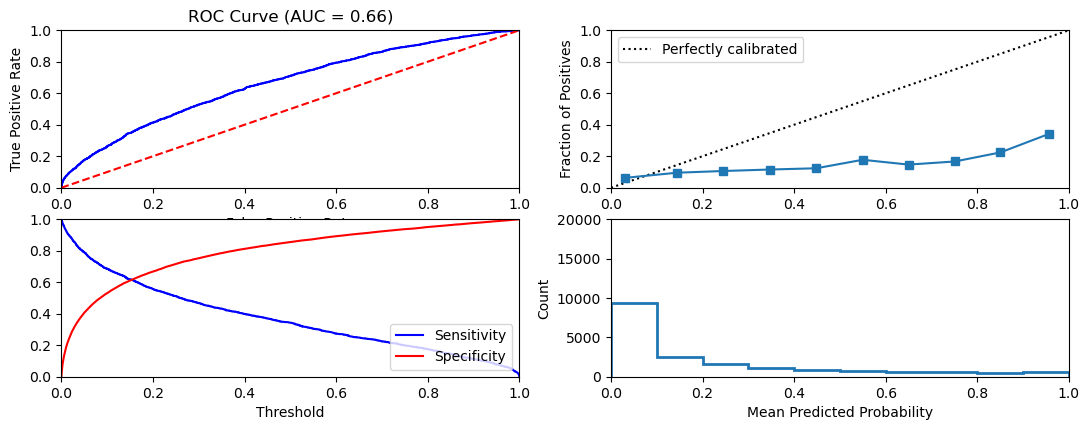

Brier score: 0.1455493782946907
Quitters predicted:  31040
percentage:  0.16774751405101598


In [370]:
CatBoost_final = CatBoostClassifier(iterations=2000,random_seed=2,class_weights= [1, 1], custom_loss='Recall',
                              depth=10, eval_metric='Recall', l2_leaf_reg=4, learning_rate=0.3, random_strength=0)

CatBoost_final.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    )

test_model(CatBoost_final, X_train, y_train, X_test, y_test)

final_predictions = CatBoost_final.predict(X)
total = len(final_predictions)
calc = np.sum(final_predictions==1)
print('Quitters predicted: ',calc)
print('percentage: ',calc/total)

In [371]:
print(CatBoost_final.get_feature_importance(prettified=True))

                Feature Id  Importances
0                  title_2    12.705069
1                  title_1    10.847899
2                total_exp    10.002615
3          time_duration_2     9.320226
4                company_1     8.897517
5     title_work_dur_check     7.202925
6                company_2     6.835242
7          education level     5.786316
8               Word_Count     5.558286
9   company_work_dur_check     5.424057
10         time_duration_1     5.189240
11                  Region     4.760966
12                   level     4.520076
13              custom_url     2.407649
14                    bins     0.541915
